In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('loan_data.csv')
df.head()


# rearrange categorical columns first

df = df[[ 'purpose','pub.rec', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util','credit.policy','inq.last.6mths','delinq.2yrs', 
         'not.fully.paid']]

df.head()

# Converting the pub feature's values into unique strings for dummy creating later
df['pub.rec'] = df['pub.rec'].apply( lambda x: 'd'+ str(x))
df

purpose pub.rec  int.rate  installment  log.annual.inc  \
0     debt_consolidation      d0    0.1189       829.10       11.350407   
1            credit_card      d0    0.1071       228.22       11.082143   
2     debt_consolidation      d0    0.1357       366.86       10.373491   
3     debt_consolidation      d0    0.1008       162.34       11.350407   
4            credit_card      d0    0.1426       102.92       11.299732   
...                  ...     ...       ...          ...             ...   
9573           all_other      d0    0.1461       344.76       12.180755   
9574           all_other      d0    0.1253       257.70       11.141862   
9575  debt_consolidation      d0    0.1071        97.81       10.596635   
9576    home_improvement      d0    0.1600       351.58       10.819778   
9577  debt_consolidation      d0    0.1392       853.43       11.264464   

        dti  fico  days.with.cr.line  revol.bal  revol.util  credit.policy  \
0     19.48   737        5639.958333      28854        52.1              1   
1     14.29   707        2760.000000      33623        76.7              1   
2     11.63   682        4710.000000       3511        25.6              1   
3      8.10   712        2699.958333      33667        73.2              1   
4     14.97   667        4066.000000       4740        39.5              1   
...     ...   ...                ...        ...         ...            ...   
9573  10.39   672       10474.000000     215372        82.1              0   
9574   0.21   722        4380.000000        184         1.1              0   
9575  13.09   687        3450.041667      10036        82.9              0   
9576  19.18   692        1800.000000          0         3.2              0   
9577  16.28   732        4740.000000      37879        57.0              0   

      inq.last.6mths  delinq.2yrs  not.fully.paid  
0                  0            0               0  
1                  0            0               0  
2                  1            0               0  
3                  1            0               0  
4                  0            1               0  
...              ...          ...             ...  
9573               2            0               1  
9574               5            0               1  
9575               8            0               1  
9576               5            0               1  
9577               6            0               1  

[9578 rows x 14 columns]

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   purpose            9578 non-null   object 
 1   pub.rec            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  credit.policy      9578 non-null   int64  
 11  inq.last.6mths     9578 non-null   int64  
 12  delinq.2yrs        9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(6), object(2)
memory usage: 1.0+ MB


Data is fully cleaned and no missing values

In [109]:
df.nunique()

purpose                 7
pub.rec                 6
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
credit.policy           2
inq.last.6mths         28
delinq.2yrs            11
not.fully.paid          2
dtype: int64

In [110]:
# Exploring unique values for categorical columns

columns = [#'credit.policy',
 'purpose',
 'pub.rec',
 #'inq.last.6mths',
 #'delinq.2yrs', #'int.rate',
 #'installment',
 #'log.annual.inc',
 #'dti',
 #'fico',
 #'days.with.cr.line',
 #'revol.bal',
 #'revol.util',
 'not.fully.paid']

for i in columns:
    print(i,len(df[i].unique()),'values ==> ',df[i].unique(),'\n')
    
    

purpose 7 values ==>  ['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational'] 

pub.rec 6 values ==>  ['d0' 'd1' 'd2' 'd3' 'd4' 'd5'] 

not.fully.paid 2 values ==>  [0 1] 



### Exploring categorical data using bar and count plot

In [111]:
#let me use the predefined functions from classification logistics model lecture



# A function to explore categorical data average not fully loan paid rate, and the count to show sample size for each category
def explore(df,x,y):
    fig, ax = plt.subplots(2,figsize = (10,7))
    sns.barplot(df,x = x,y =y, ax = ax[0])
    sns.countplot(df,x = x, ax = ax[1])
    plt.tight_layout()

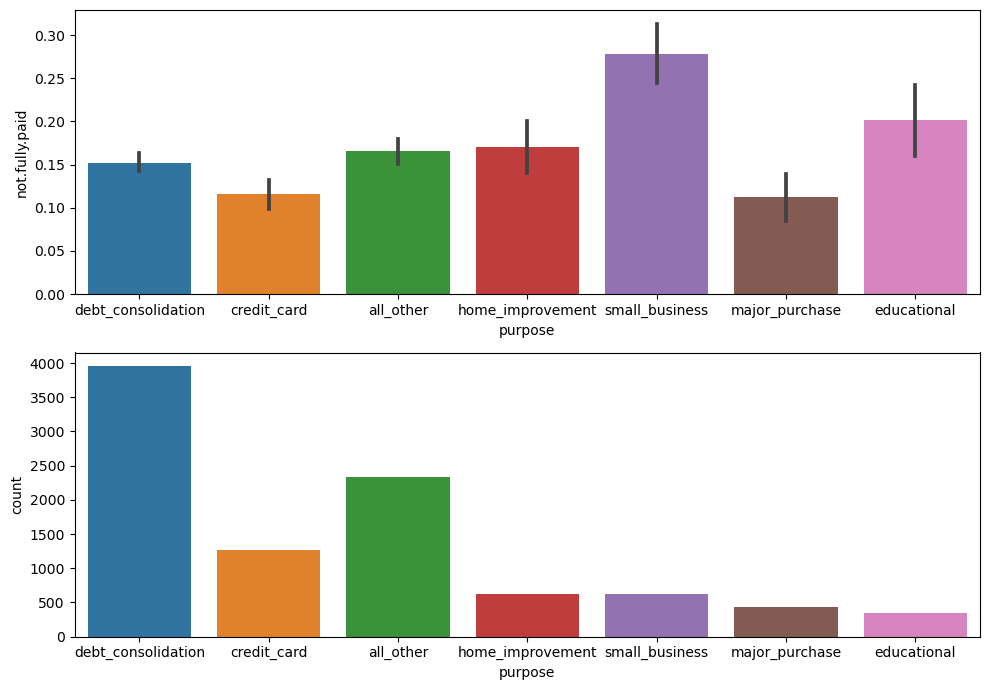

In [112]:
explore(df,'purpose','not.fully.paid')

# it is very obvious that people who borrow money for their small businesses or education are less likely to pay back their their debts

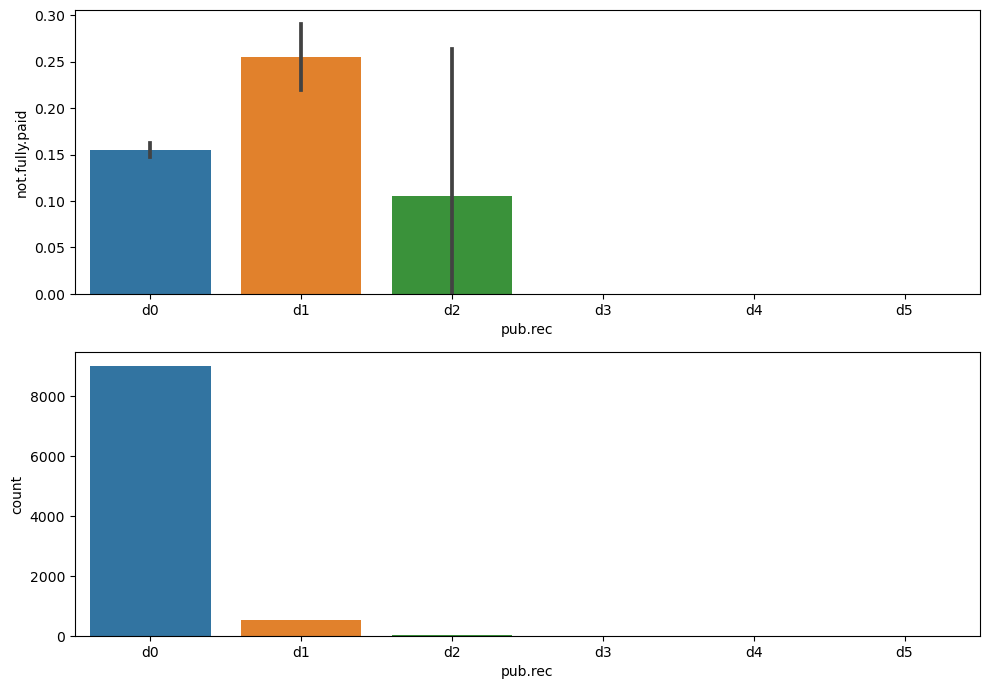

In [113]:
explore(df,'pub.rec','not.fully.paid')

# have considered pub.rec as category as the not fully paid not shown any linear trend with pub.rec values

### Exploring Numeric data using corr heat map and pair plot

In [114]:
list(df.columns)

['purpose',
 'pub.rec',
 'int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'credit.policy',
 'inq.last.6mths',
 'delinq.2yrs',
 'not.fully.paid']

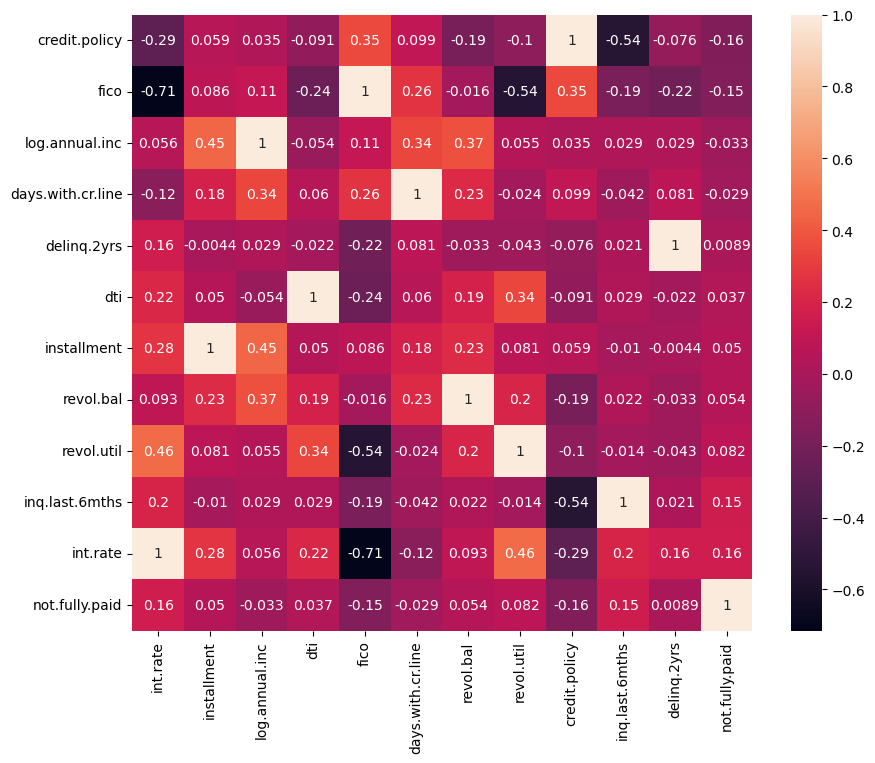

In [115]:
plt.figure(figsize = (10,8))

sns.heatmap(df.drop(['purpose','pub.rec'], axis= 1).corr().sort_values('not.fully.paid'), annot = True)

# The heatmap shows small correlation between the features and target value 
# but the model might predict somthing out of the below 4 features that thier corr are around 0.15 & -0.15
# credit.policy / fico / inq.last.6mths / int.rate
plt.show()

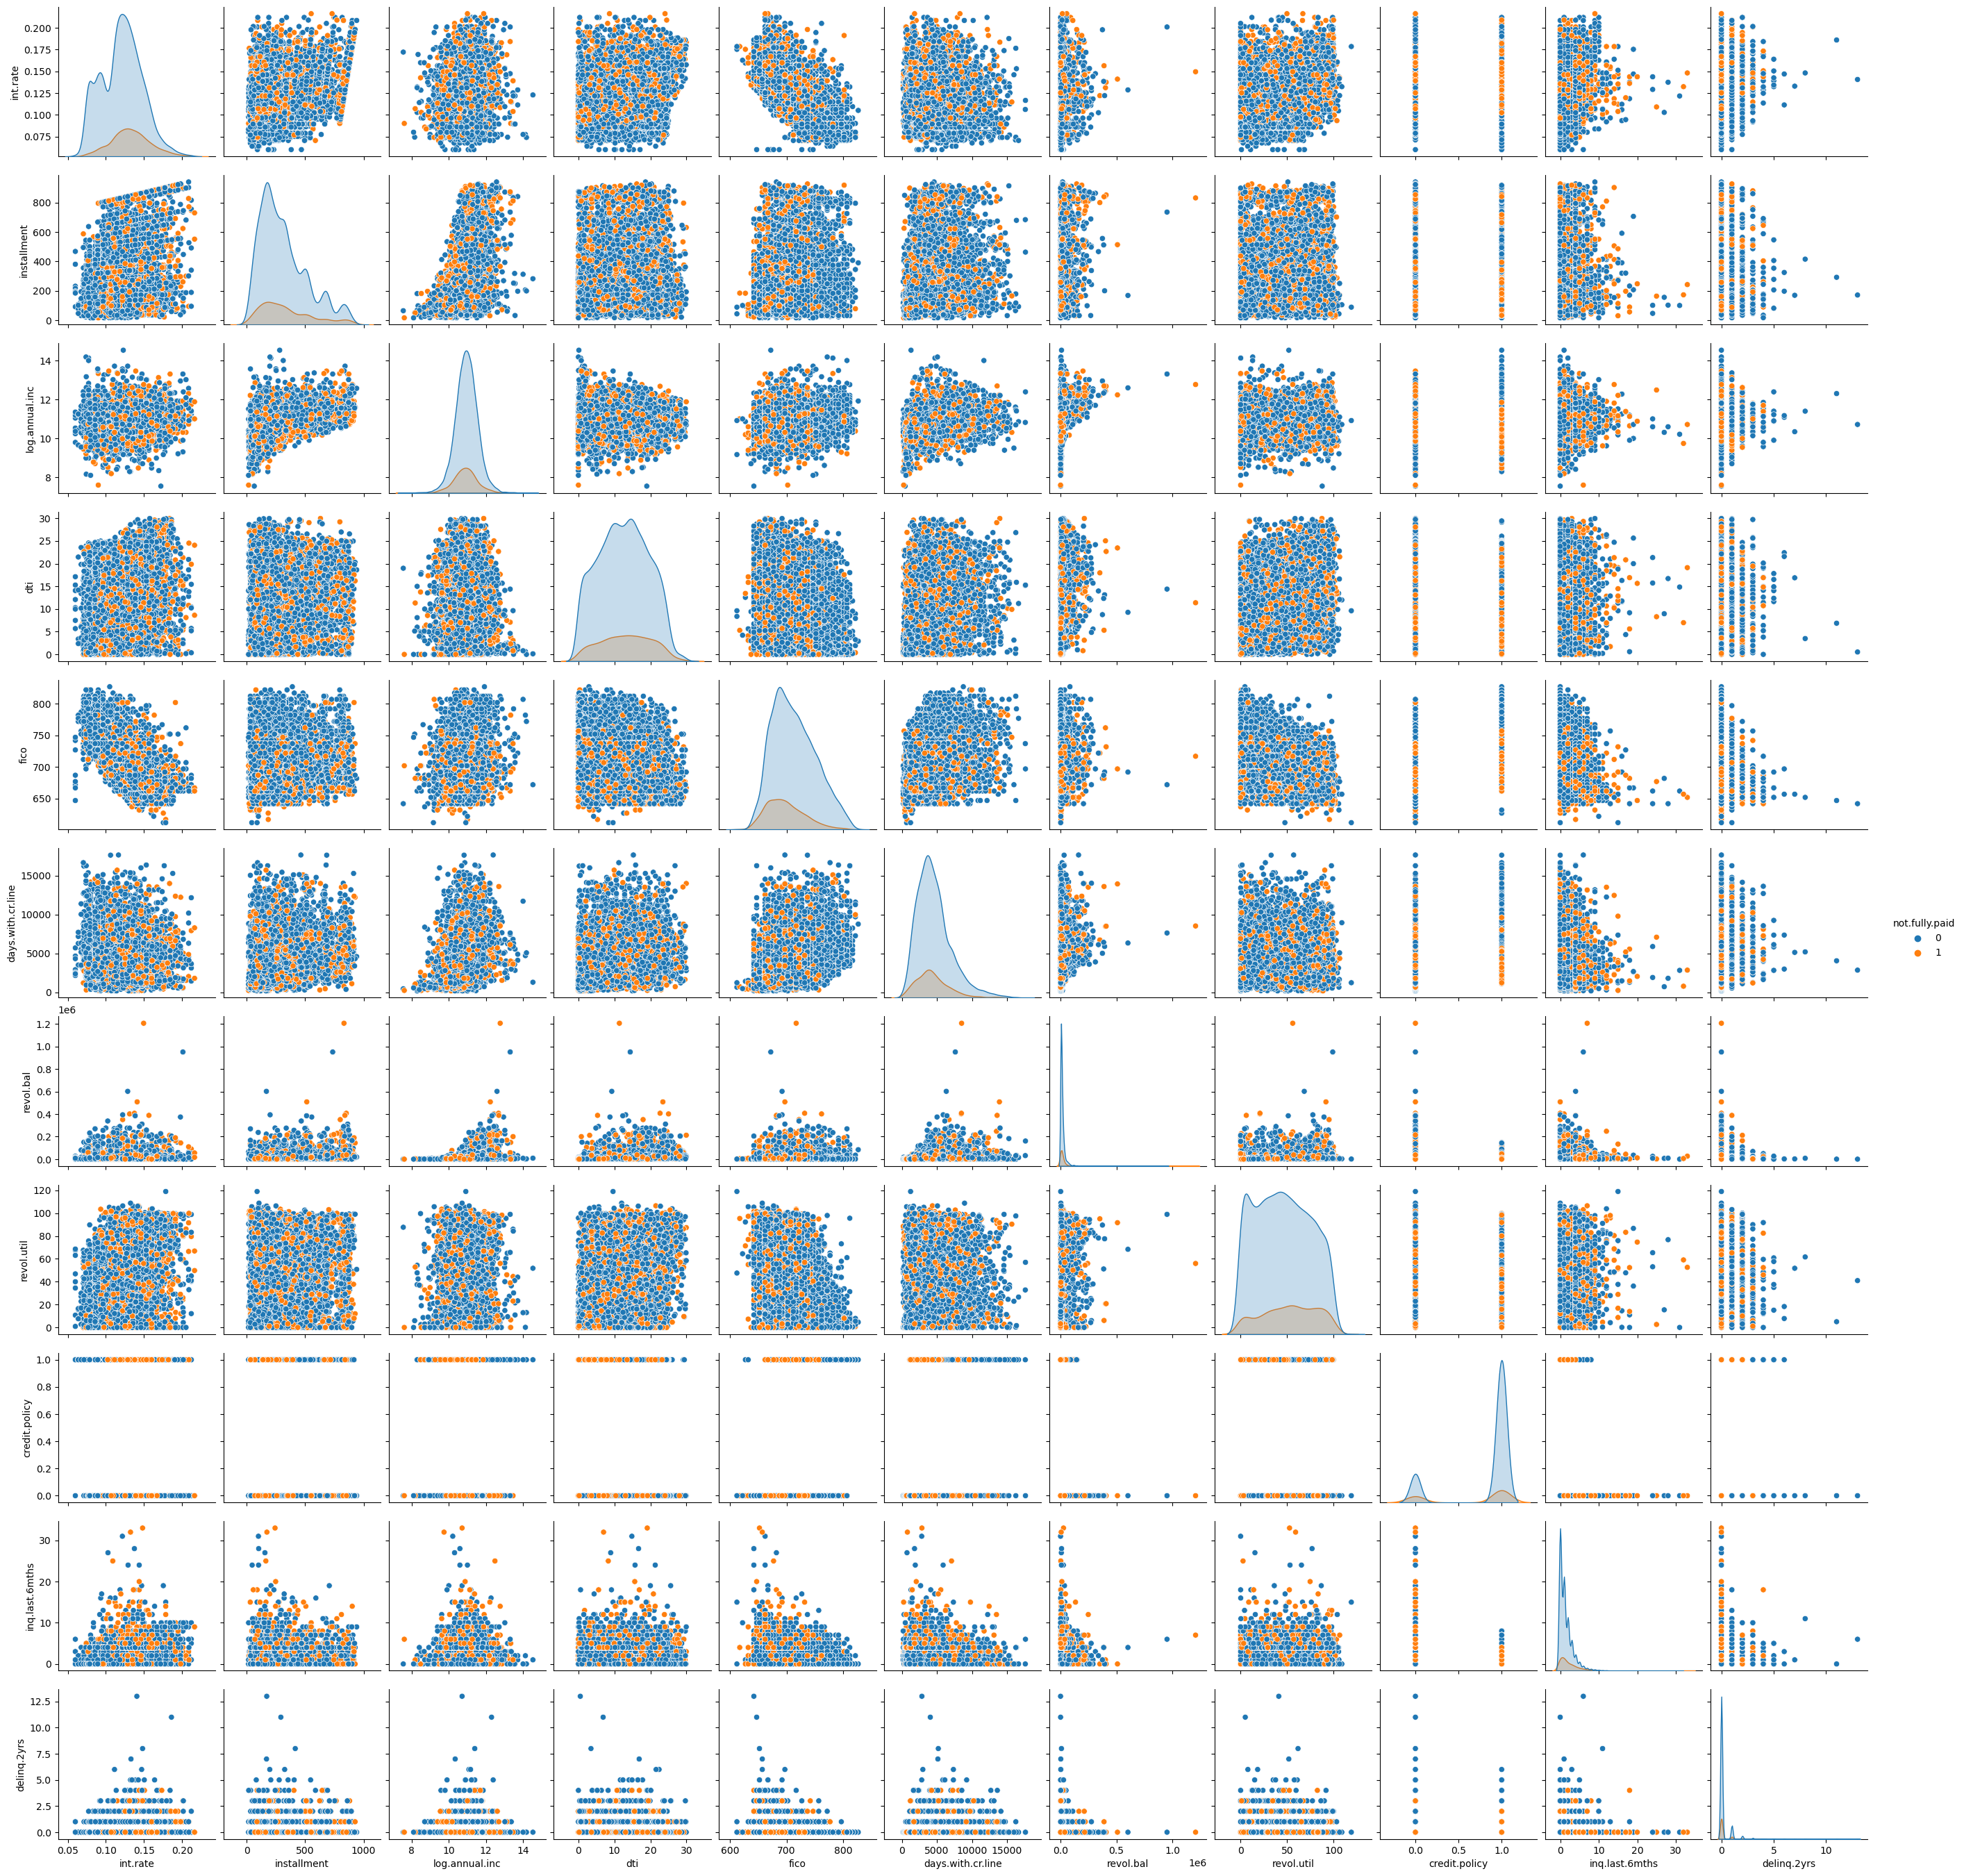

In [116]:
sns.pairplot(df.drop(['purpose','pub.rec'], axis= 1), hue = 'not.fully.paid')

# as shown from pairplot kind = hist, the red dots might be consentrated in certain areas in the scatter plots between each feature
# model accuracy might not be very high

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score


# A function to split a categorical column into dummy numeric columns of zeros and ones
def dummy_me(df,col):
    dummy = pd.get_dummies(df[col], drop_first=True)
    df = pd.concat([df,dummy], axis = 1)
    df.drop(col,axis= 1, inplace = True)
    return df


df = dummy_me(df,'purpose')
df = dummy_me(df,'pub.rec')

In [137]:
X = df.drop('not.fully.paid', axis= 1)
y = df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfc = RandomForestClassifier().fit(X_train,y_train)
predictions = rfc.predict(X_test)

print(classification_report(predictions,y_test))
confusion_matrix(predictions,y_test)

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      2858
           1       0.02      0.56      0.04        16

    accuracy                           0.85      2874
   macro avg       0.51      0.71      0.48      2874
weighted avg       0.99      0.85      0.91      2874



array([[2424,  434],
       [   7,    9]], dtype=int64)

Model Accuracy is very high BUT

The model failed to detect the peopole who are not going to fully pay their loans as expected due to low corr between the model features and target column